# Timeseries Forecast Predictiopn

### Muhammad Galang Al-Hakim

### HCK-004

# Import Library

In [170]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install pmdarima
import pmdarima as pm
import joblib

# Data Loading

In [109]:
df = pd.read_csv(r'C:\Users\Galang\Documents\H8\Project\sample_dataset_timeseries_noarea.csv')
df

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [110]:
df.head()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


In [111]:
df.tail()

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


In [113]:
df.describe()

,quantity
count,102733.000000
mean,3191.562419
std,12074.631014
min,0.000000
25%,75.000000
50%,414.000000
75%,1890.000000
max,774732.000000


In [114]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
102728    False
102729    False
102730    False
102731    False
102732    False
Length: 102733, dtype: bool

In [115]:
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

In [116]:
df.dropna()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [117]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

# Exploration Data Analysis (EDA)

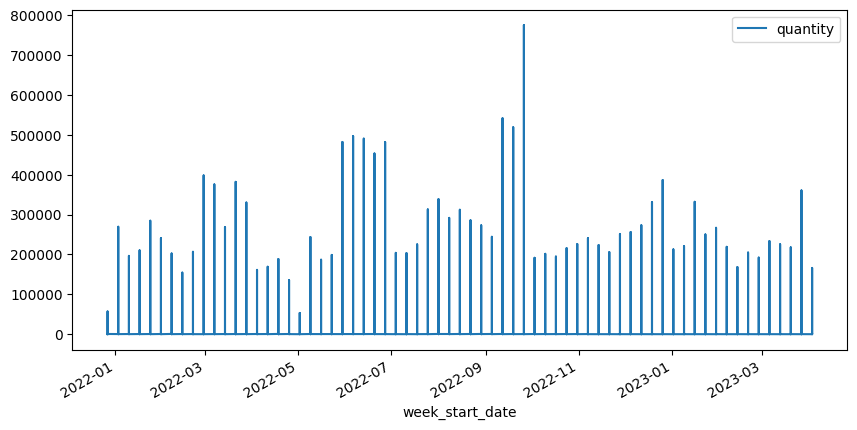

In [118]:
df.plot(x="week_start_date", y="quantity", figsize=(10,5))
plt.show()

Jumlah quantity berdasarkan tanggal dimulai

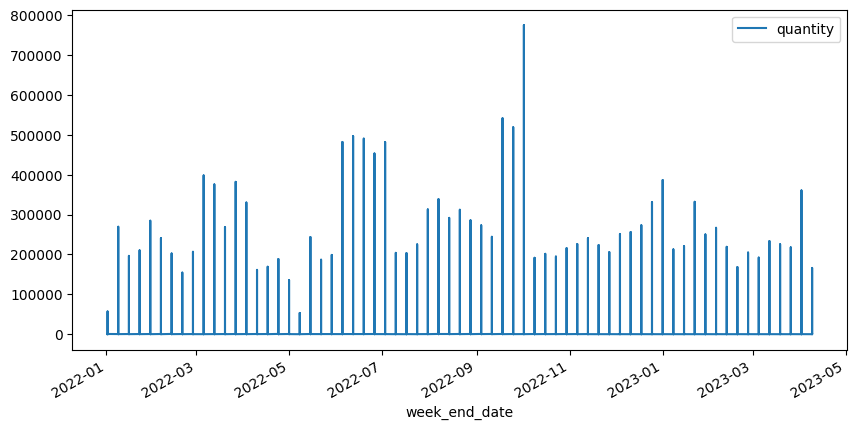

In [119]:
df.plot(x="week_end_date", y="quantity", figsize=(10,5))
plt.show()

Jumlah quantity berdasarkan tanggal berakhir

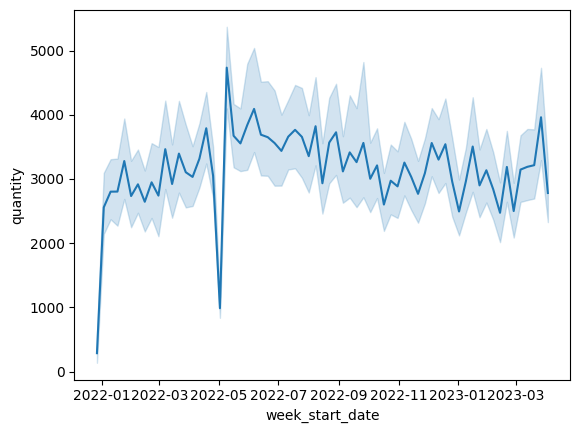

In [120]:
sns.lineplot(data=df, x='week_start_date', y='quantity')
plt.show()

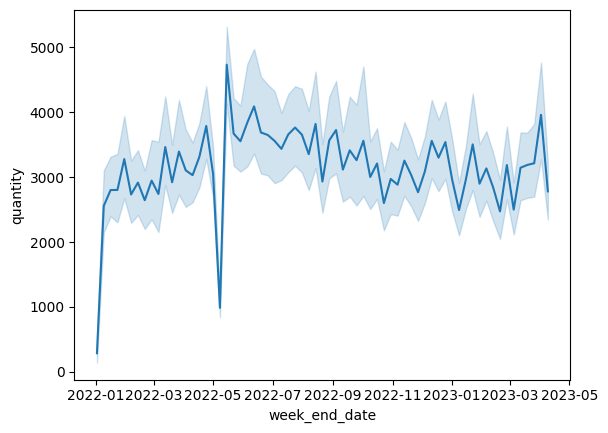

In [121]:
sns.lineplot(data=df, x='week_end_date', y='quantity')
plt.show()

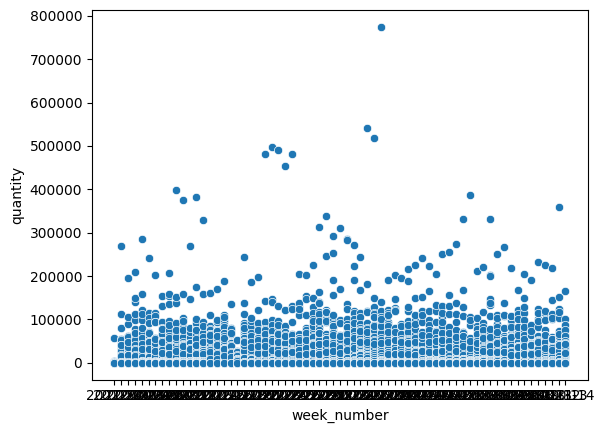

In [122]:
sns.scatterplot(data=df, x='week_number', y='quantity')
plt.show()


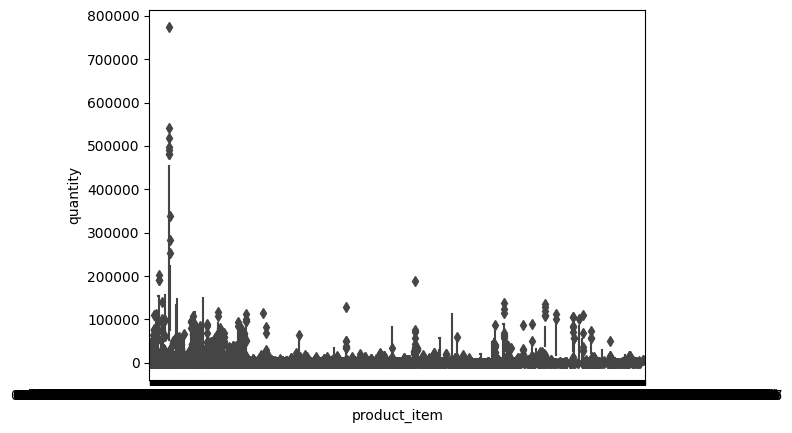

In [123]:
sns.boxplot(data=df, x='product_item', y='quantity')
plt.show()


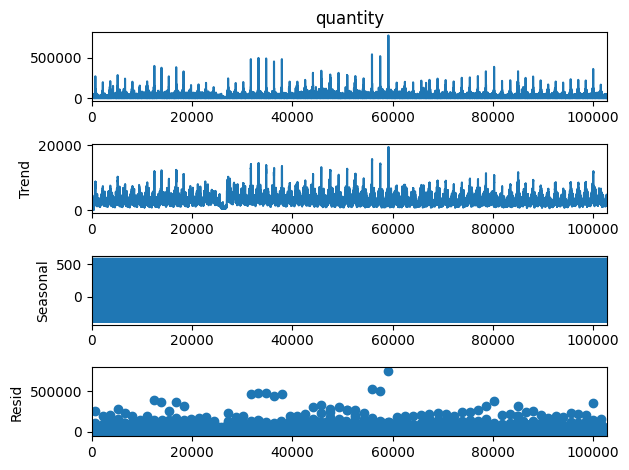

In [124]:
# Plot a seasonal decomposition of the time series
decomposition = seasonal_decompose(df['quantity'], model='additive', period=52)
fig = decomposition.plot()
plt.show()

# Model Definition & Training

## Model ARIMA

In [138]:
df1 = df_grouped = df.groupby(["week_start_date"])["quantity"].mean()

In [139]:
#splitting train and test
train=df1[0:50] 
test=df1[50:]

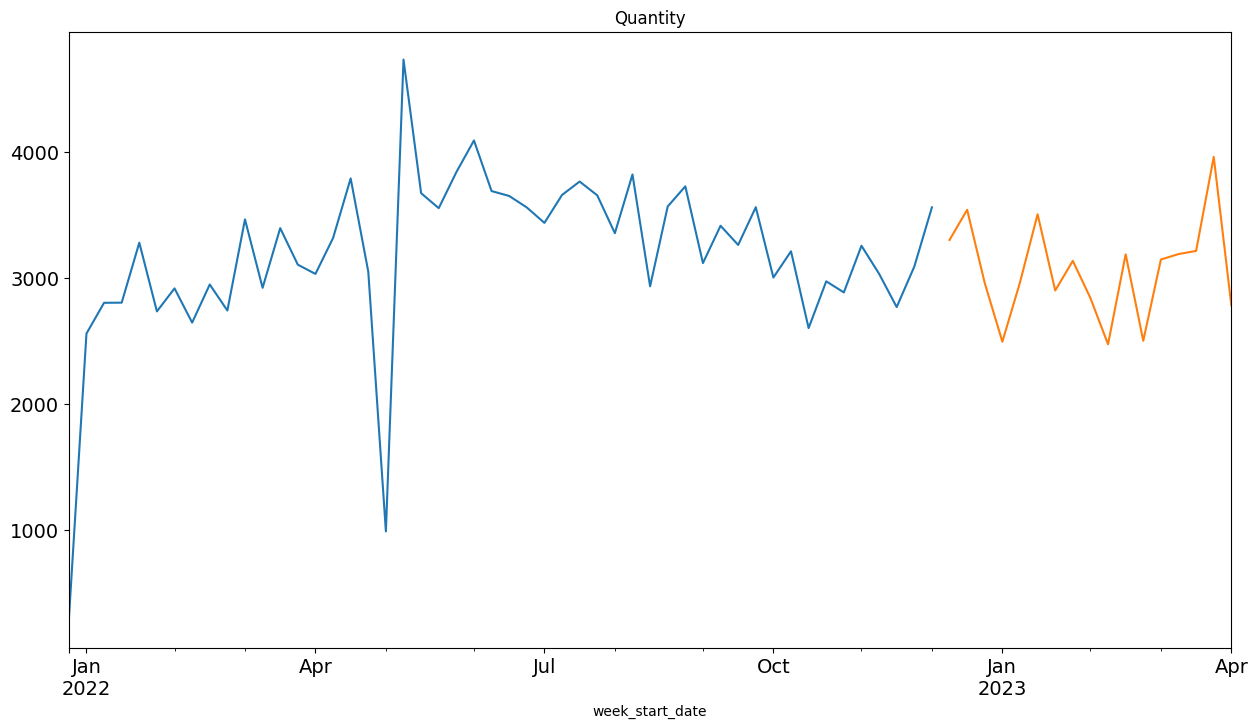

In [140]:
train.plot(figsize=(15,8), title= 'Quantity', fontsize=14)
test.plot(figsize=(15,8), title= 'Quantity', fontsize=14)

plt.show()

In [141]:
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
check_stationarity(df1)

ADF Statistic: -8.635915
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Stationary


Text(0, 0.5, 'Sales')

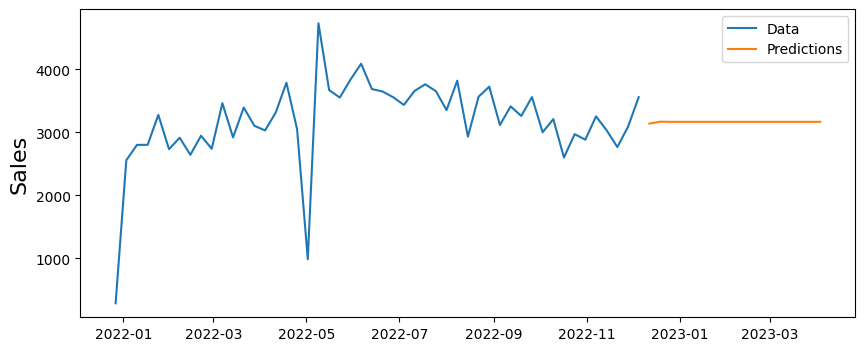

In [163]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

predictions = model_fit.predict(start='2022-12-12', end='2023-04-03')
plt.figure(figsize=(10,4))

plt.plot(train)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

## Auto Corelation mengunakan Auto ARIMA

In [158]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=783.891, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=797.819, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=789.029, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=782.019, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=796.162, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=783.834, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=784.999, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=781.068, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=782.941, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=782.882, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=787.654, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.538 seconds
                               SARIMAX Results                                
Dep. Variable:           

Text(0, 0.5, 'Sales')

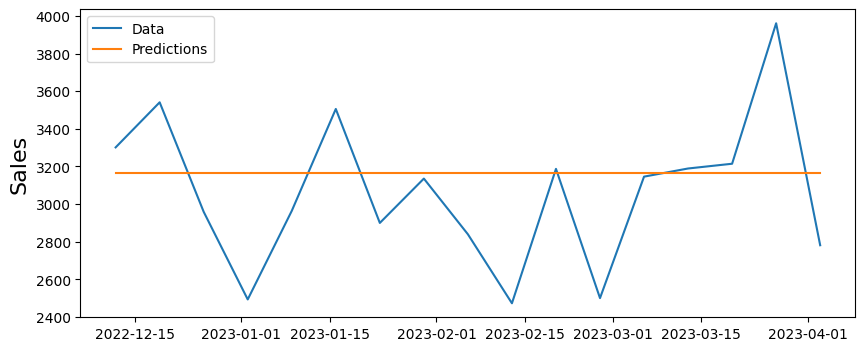

In [166]:
model = ARIMA(train, order=(0,1,1))
model_fit = model.fit()

predictions = model_fit.predict(start='2022-12-12', end='2023-04-03')
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

# Model Evaluation

In [167]:
mean_absolute_error(test, predictions)

306.4250629436734

In [168]:
mean_absolute_percentage_error(test,predictions)

0.10532311051872885

# Model Saving

In [171]:
# produk a1
with open('arima.pkl', 'wb') as file_1:
  joblib.dump(model, file_1)

# Model Analysis

Prediksi timeseries menggunakan model ARIMA sangat baik karena dapat meprediksi quantity 3 bulan kedepan dan mendapatkan hasil MAE & MAPE yang cukup rendah MAE : 306.4250629436734 sedangkan MAPE : 0.10532311051872885

# Overall Analysis

Model berjalan dengan baik dengan nilai MAE dan MAPE yang rendah dengan model ARIMA